In [45]:
import sqlite3
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
# Connect to .db file (or create it if it doesn't exist)
conn = sqlite3.connect("../heart.db")

query = "SELECT * FROM heart_attack_risk"

# Load the query result into a DataFrame
df = pd.read_sql_query(query, conn)

conn.close()

In [47]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4,0,...,0,6,0,158,88,0,1,1,0,0
1,21,389,98,1,1,1,1,1,1,1,...,1,7,0,165,93,0,1,0,0,1
2,21,324,72,1,0,0,0,0,2,1,...,4,4,0,174,99,1,0,0,1,0
3,84,383,73,1,1,1,0,1,9,1,...,3,4,0,163,100,0,1,1,0,0
4,66,318,93,1,1,1,1,0,5,1,...,1,5,0,91,88,0,1,0,0,1


In [48]:
# IS target feature balanced?
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [49]:
# Separate into X and y
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1, stratify=y
)


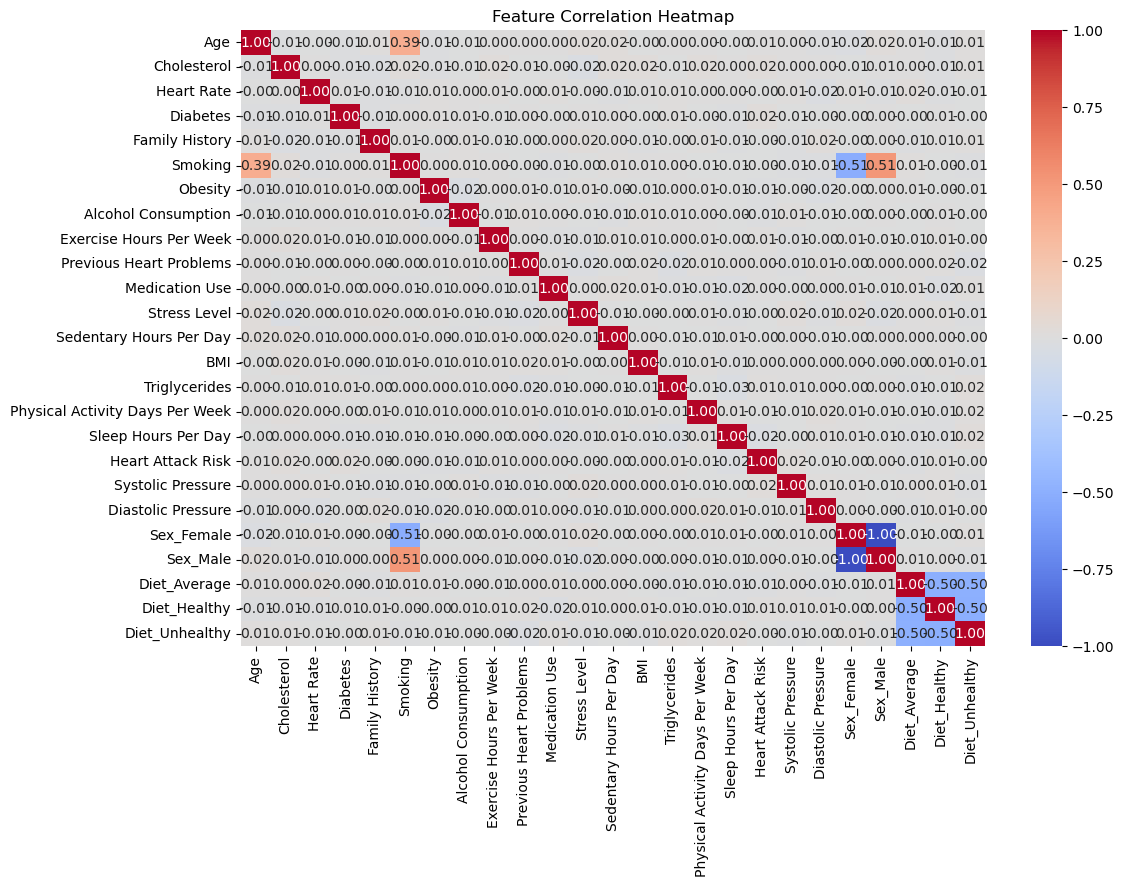

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [51]:
#INITIALIZE AND FIT A LOGISTIC REGRESSION MODEL
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#EVALUATE THE MODEL
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print('True Negative    False Positive')

print(confusion_matrix(y_test, y_pred))
print('False Negative   True Positive')

Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

Confusion Matrix:
True Negative    False Positive
[[1687    0]
 [ 942    0]]
False Negative   True Positive


c:\Users\james\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\james\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\james\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a balanced Random Forest
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",'True Negative    False Positive\n', confusion_matrix(y_test, y_pred),'\n False Negative   True Positive')


Accuracy: 0.6375047546595664
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      1687
           1       0.36      0.01      0.03       942

    accuracy                           0.64      2629
   macro avg       0.50      0.50      0.40      2629
weighted avg       0.54      0.64      0.51      2629

Confusion Matrix:
 True Negative    False Positive
 [[1662   25]
 [ 928   14]] 
 False Negative   True Positive


In [53]:
import pandas as pd


X_train_df = pd.DataFrame(X_train, columns=X.columns)  # Replace feature_names with actual column names

# Get feature importance from Random Forest
feature_importance = model_rf.feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)


                            Feature  Importance
14                    Triglycerides    0.092855
1                       Cholesterol    0.089631
2                        Heart Rate    0.083641
17                Systolic Pressure    0.083482
0                               Age    0.083372
18               Diastolic Pressure    0.079072
8           Exercise Hours Per Week    0.067671
13                              BMI    0.067547
12          Sedentary Hours Per Day    0.056911
11                     Stress Level    0.052780
15  Physical Activity Days Per Week    0.049987
16              Sleep Hours Per Day    0.045552
4                    Family History    0.015716
9           Previous Heart Problems    0.015056
7               Alcohol Consumption    0.014615
6                           Obesity    0.013780
10                   Medication Use    0.013748
3                          Diabetes    0.013125
23                   Diet_Unhealthy    0.012040
21                     Diet_Average    0